In [68]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

In [69]:
# 폰트 깨짐 방지
font_path = "data/fonts/MALGUN.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 마이너스(-) 표시 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 그림 크기
# plt.rcParams['figure.figsize'] = (8,6)

In [70]:
# 관광지 파일 이름
tpFileName = 'data/서울특별시_관광지입장정보_2011_2016.json'
jsonTP = json.loads(open(tpFileName, 'r', encoding='utf-8').read()) # r:읽기전용
tour_table = pd.DataFrame(jsonTP, columns=['yyyymm', 'resNm', 'ForNum'])
tour_table = tour_table.set_index('yyyymm')
# tour_table
tour_table.shape

(894, 2)

In [71]:
resNm = tour_table.resNm.unique()
resNm

array(['창덕궁', '운현궁', '경복궁', '창경궁', '종묘', '국립중앙박물관', '서울역사박물관', '덕수궁',
       '서울시립미술관 본관', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관', '서대문자연사박물관',
       '트릭아이미술관', '헌릉ㆍ인릉', '선릉·정릉', '롯데월드'], dtype=object)

In [72]:
fv_CFileName = 'data/중국(112)_해외방문객정보_2011_2016.json'
jsonFV = json.loads(open(fv_CFileName, 'r', encoding='utf-8').read())
china_table = pd.DataFrame(jsonFV, columns=['yyyymm', 'visit_cnt'])
china_table = china_table.set_index('yyyymm')
china_table

,visit_cnt
yyyymm,
201101,91252
201102,140571
201103,141457
201104,147680
201105,154066
...,...
201608,513275
201609,591242
201610,650174


In [73]:
fv_UFileName = 'data/미국(275)_해외방문객정보_2011_2016.json'
jsonFV = json.loads(open(fv_UFileName, 'r', encoding='utf-8').read())
usa_table = pd.DataFrame(jsonFV, columns=['yyyymm', 'visit_cnt'])
usa_table = usa_table.set_index('yyyymm')
usa_table

,visit_cnt
yyyymm,
201101,43065
201102,41077
201103,54610
201104,59616
201105,59780
...,...
201608,63522
201609,63793
201610,77878


In [74]:
fv_JFileName = 'data/일본(130)_해외방문객정보_2011_2016.json'
jsonFV = json.loads(open(fv_JFileName, 'r', encoding='utf-8').read())
japan_table = pd.DataFrame(jsonFV, columns=['yyyymm', 'visit_cnt'])
japan_table = japan_table.set_index('yyyymm')
japan_table

,visit_cnt
yyyymm,
201101,209184
201102,230362
201103,306126
201104,239075
201105,241695
...,...
201608,148632
201609,157313
201610,180348


In [75]:
usa_table = usa_table.rename(columns={'visit_cnt':'usa'})
china_table = china_table.rename(columns={'visit_cnt':'china'})
japan_table = japan_table.rename(columns={'visit_cnt':'japan'})

In [76]:
fv_table = pd.merge(china_table, japan_table, left_index=True, right_index=True)
fv_table

,china,japan
yyyymm,,
201101,91252,209184
201102,140571,230362
201103,141457,306126
201104,147680,239075
201105,154066,241695
...,...,...
201608,513275,148632
201609,591242,157313
201610,650174,180348


In [77]:
fv_table = pd.merge(fv_table, usa_table, left_index=True, right_index=True)
fv_table

,china,japan,usa
yyyymm,,,
201101,91252,209184,43065
201102,140571,230362,41077
201103,141457,306126,54610
201104,147680,239075,59616
201105,154066,241695,59780
...,...,...,...
201608,513275,148632,63522
201609,591242,157313,63793
201610,650174,180348,77878


In [88]:
def setScatterGraph(tour_table, fv_table, tourpoint):
    tour = tour_table[tour_table['resNm'] == tourpoint]
    # print(tour)
    merge_table = pd.merge(tour, fv_table, left_index=True, right_index=True)
    # print(merge_table)

    fig = plt.figure(figsize=(20,6))
    fig.suptitle(tourpoint + " 상관관계 분석")
    plt.subplot(1,3,1)
    plt.xlabel('중국인 입국자 수')
    plt.ylabel('외국인 입장객 수')
    r1 = merge_table['china'].corr(merge_table['ForNum'])
    plt.title('r={:.5f}'.format(r1))
    plt.scatter(list(merge_table.china), list(merge_table.ForNum), edgecolors=None, alpha=0.75)

    plt.subplot(1,3,2)
    plt.xlabel('일본인 입국자 수')
    plt.ylabel('외국인 입장객 수')
    r2 = merge_table['japan'].corr(merge_table['ForNum'])
    plt.title('r={:.5f}'.format(r2))
    plt.scatter(list(merge_table.japan), list(merge_table.ForNum), edgecolors=None, alpha=0.75)

    plt.subplot(1,3,3)
    plt.xlabel('미국인 입국자 수')
    plt.ylabel('외국인 입장객 수')
    r3 = merge_table['usa'].corr(merge_table['ForNum'])
    plt.title('r={:.5f}'.format(r3))
    plt.scatter(list(merge_table.usa), list(merge_table.ForNum), edgecolors=None, alpha=0.75)

    return [tourpoint, r1, r2, r3]

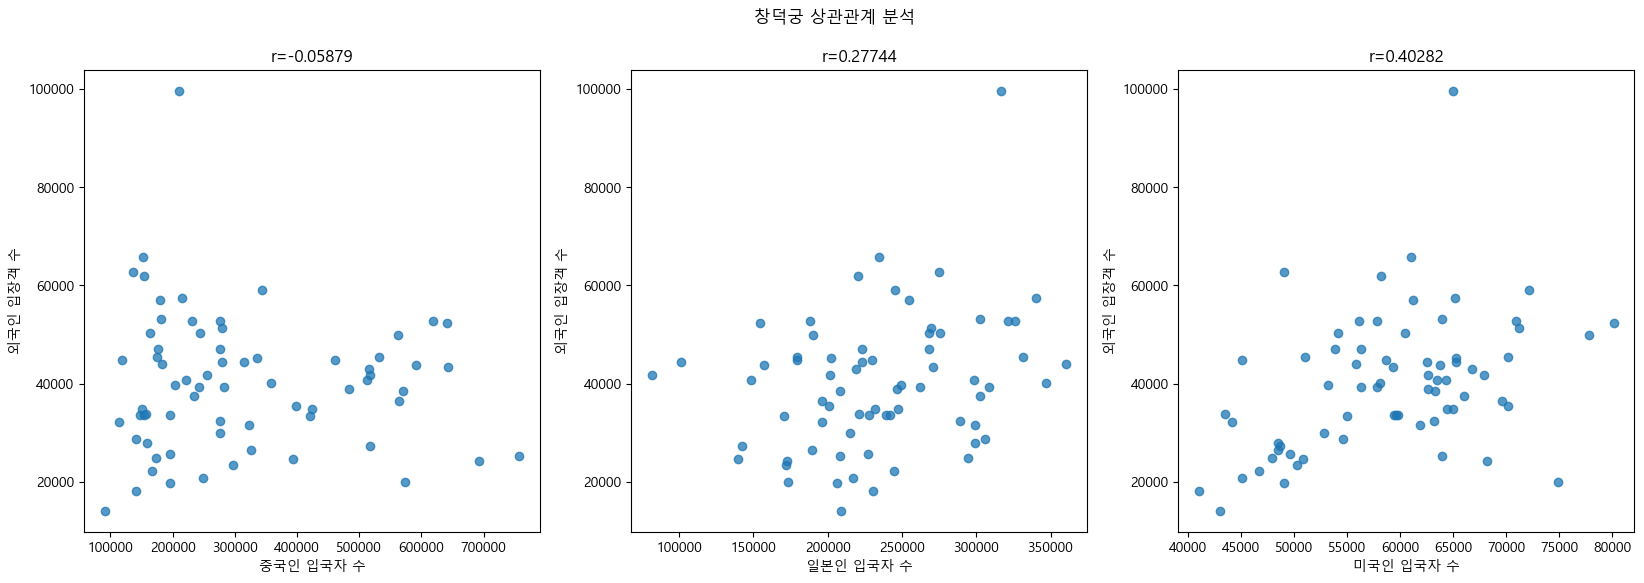

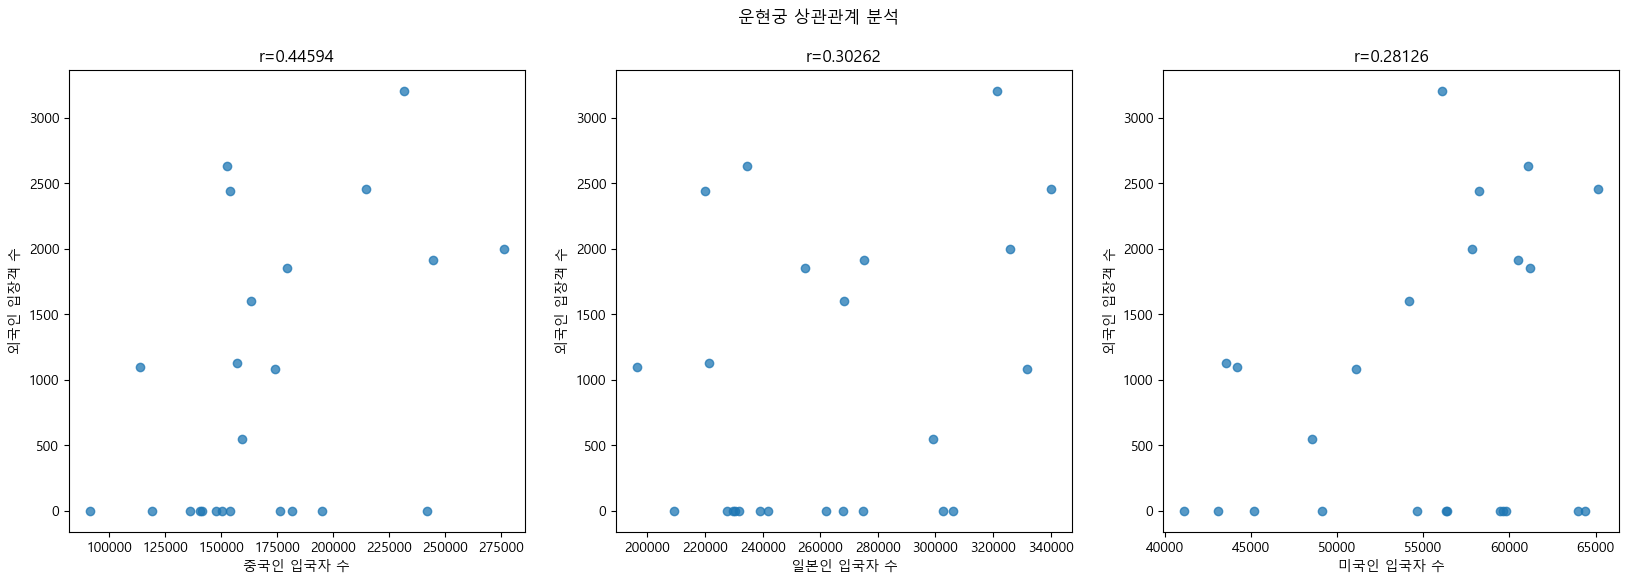

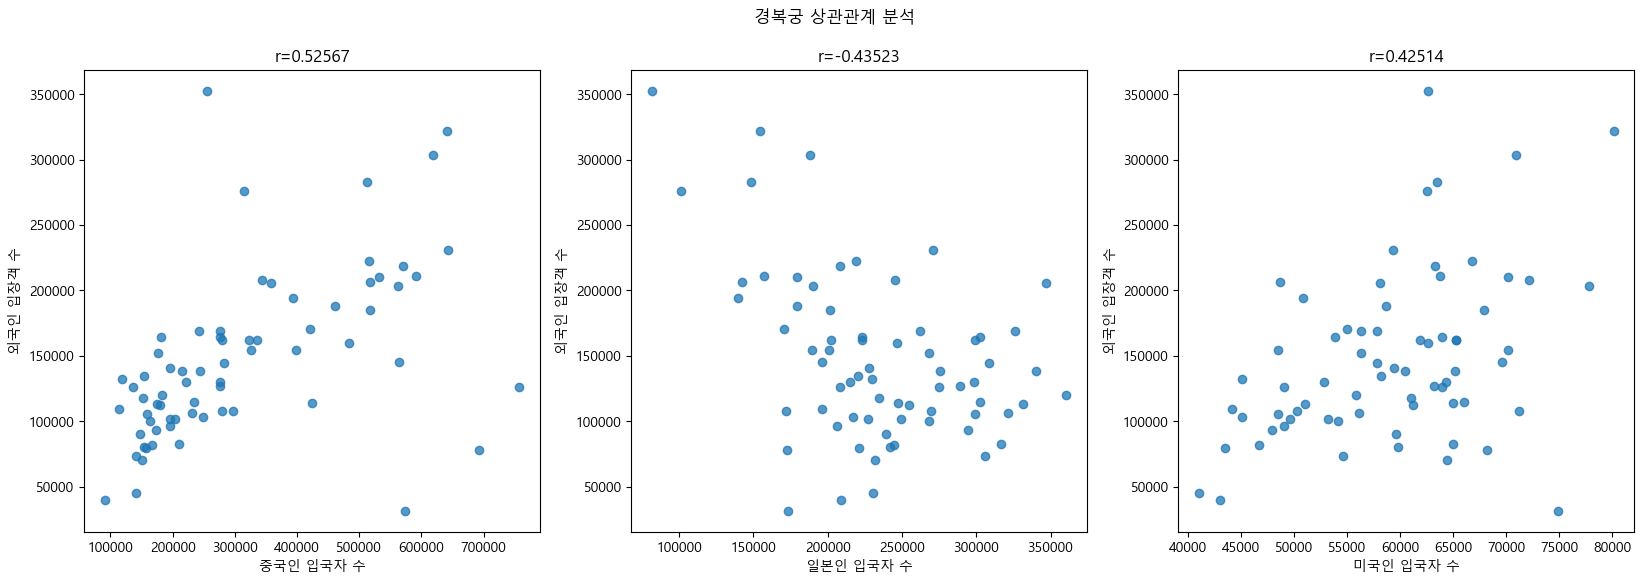

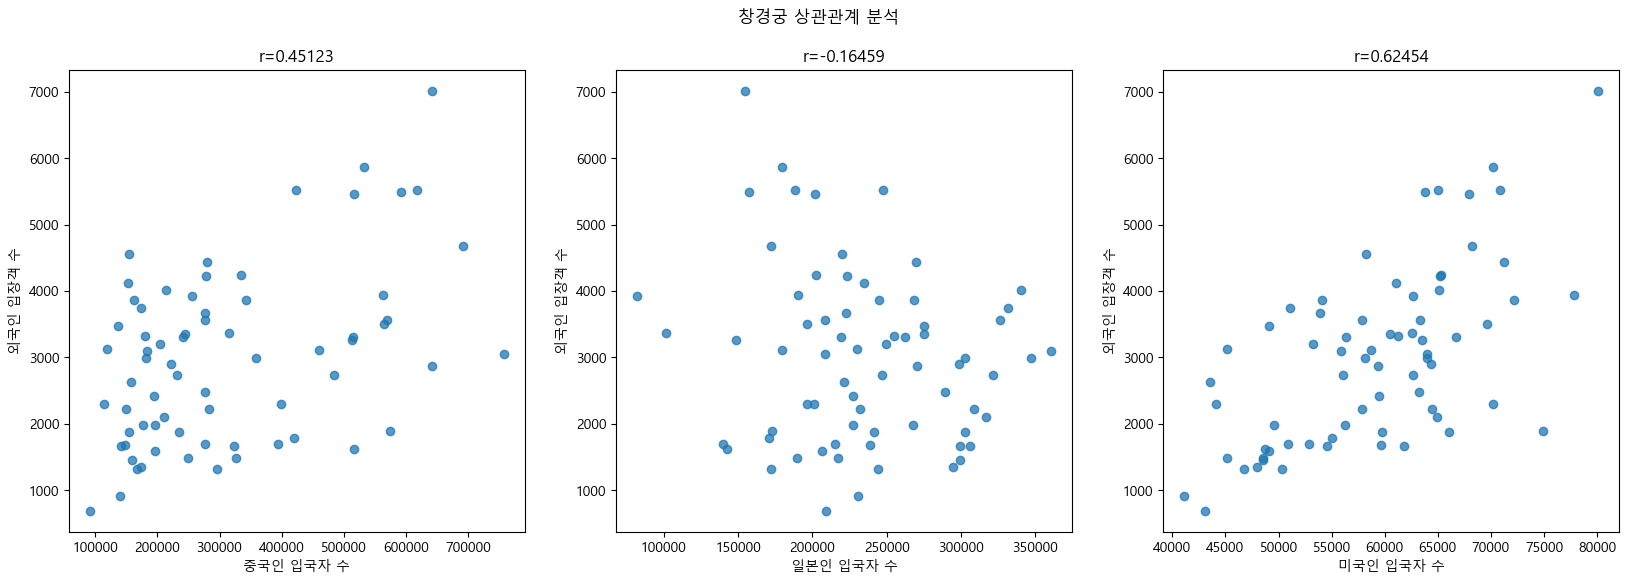

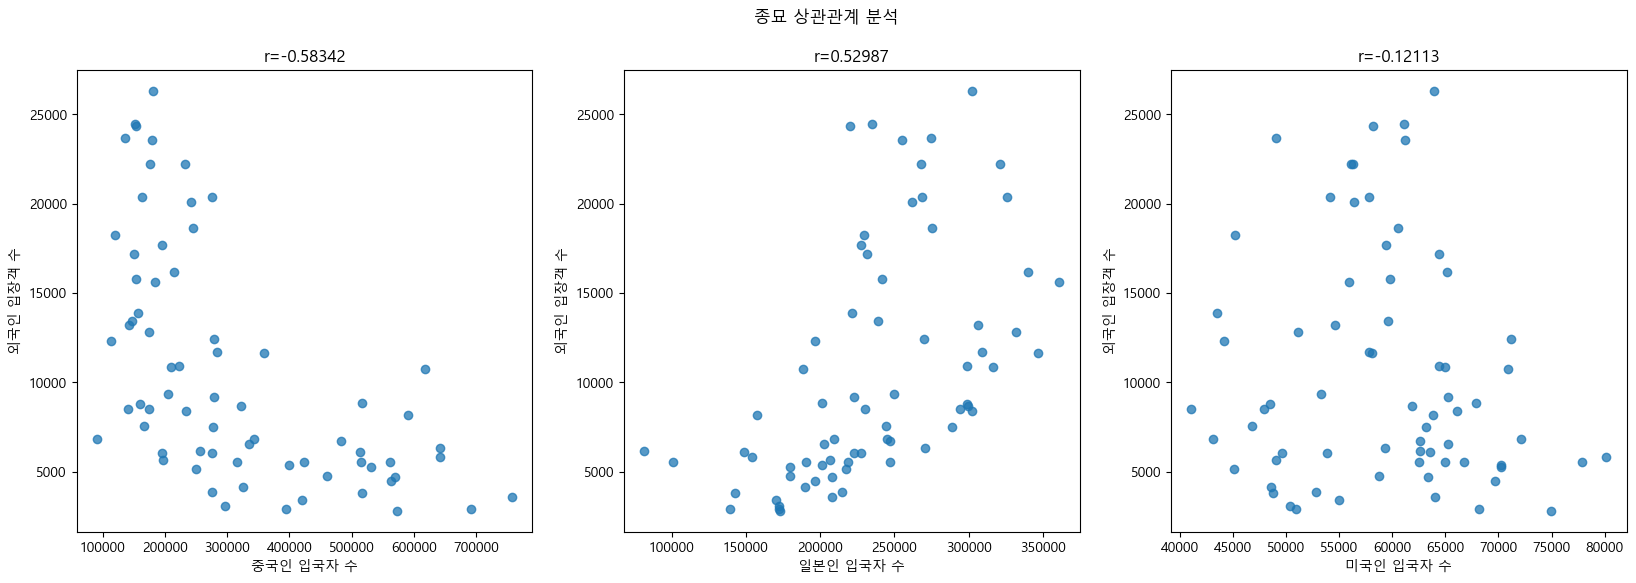

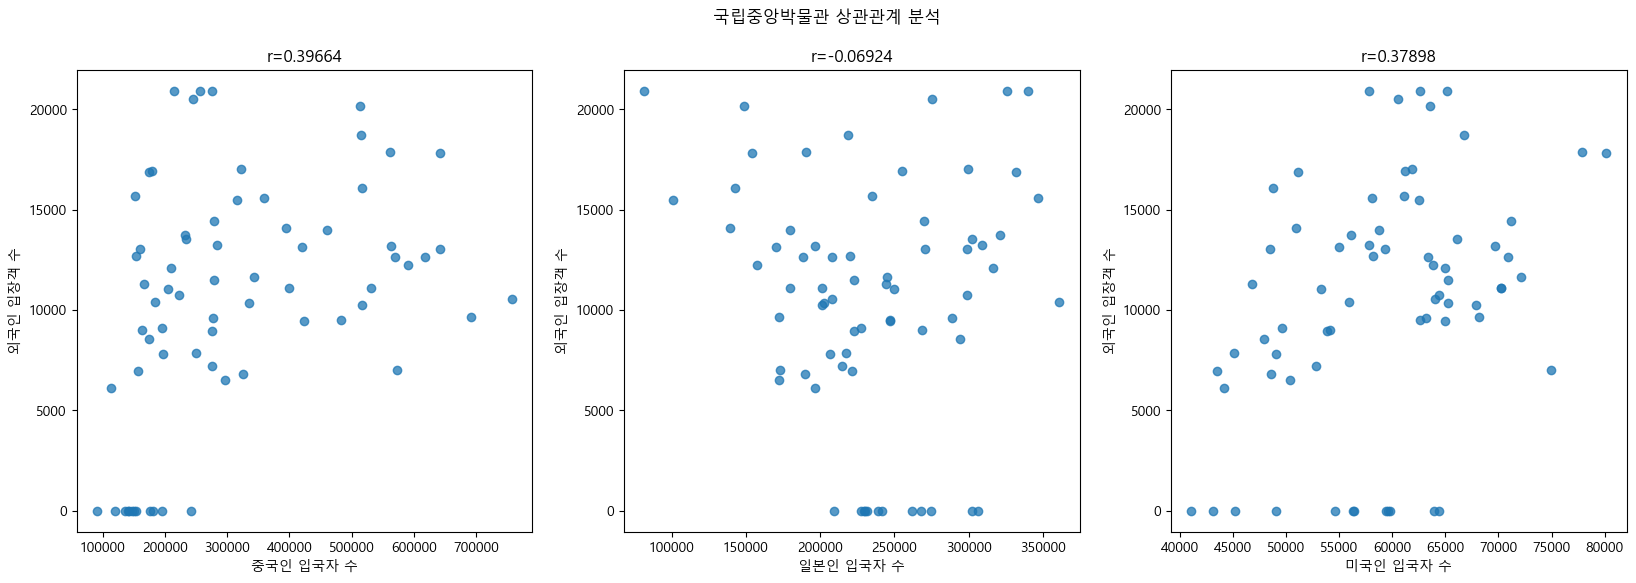

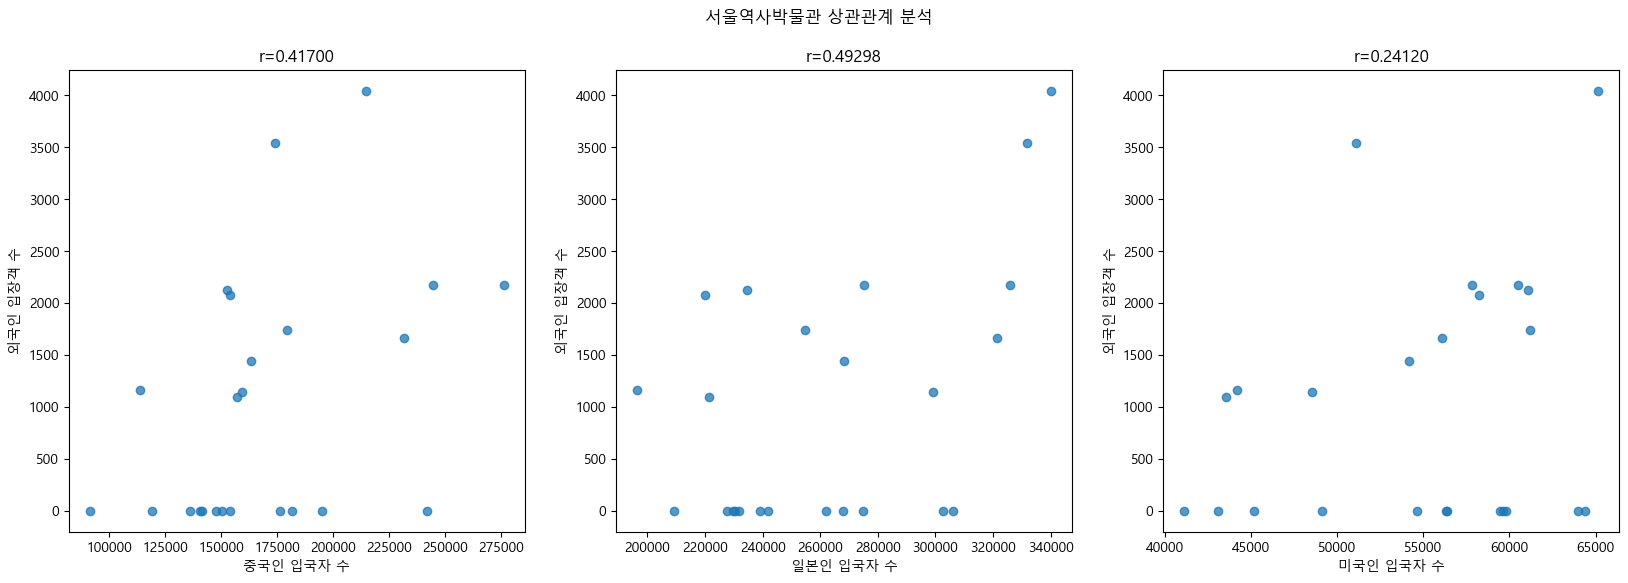

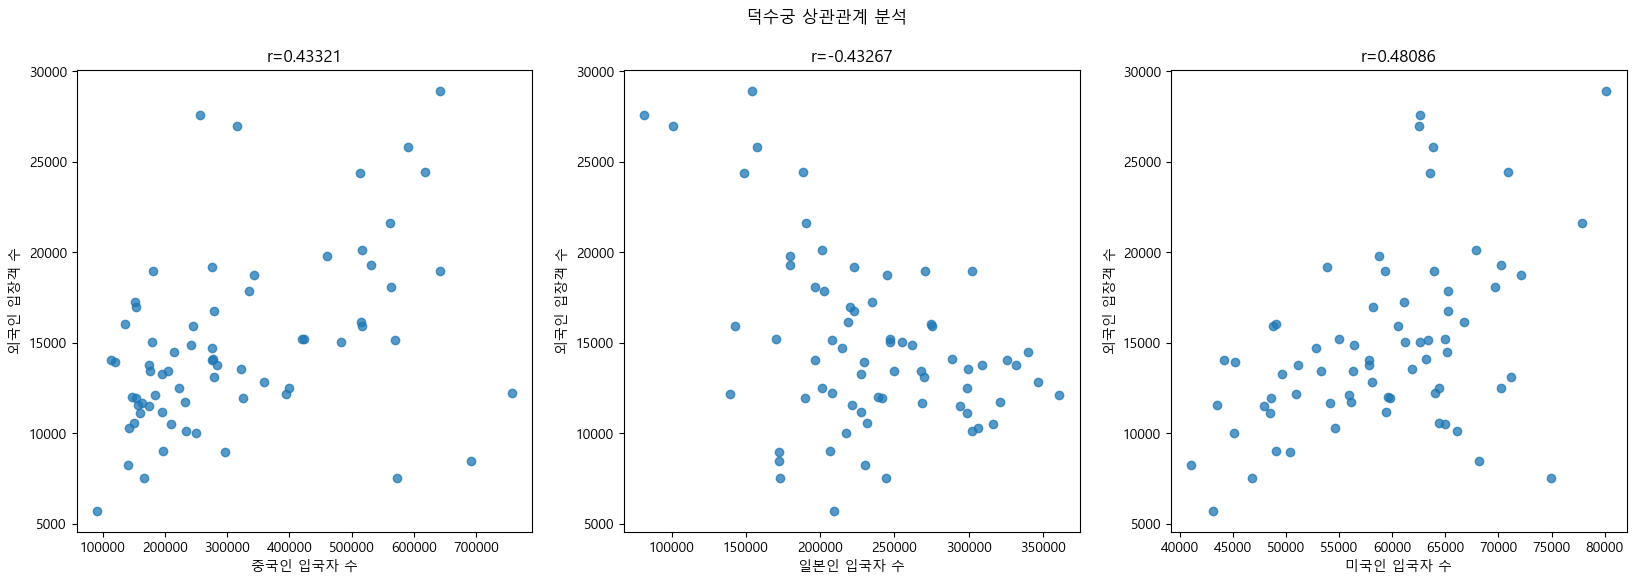

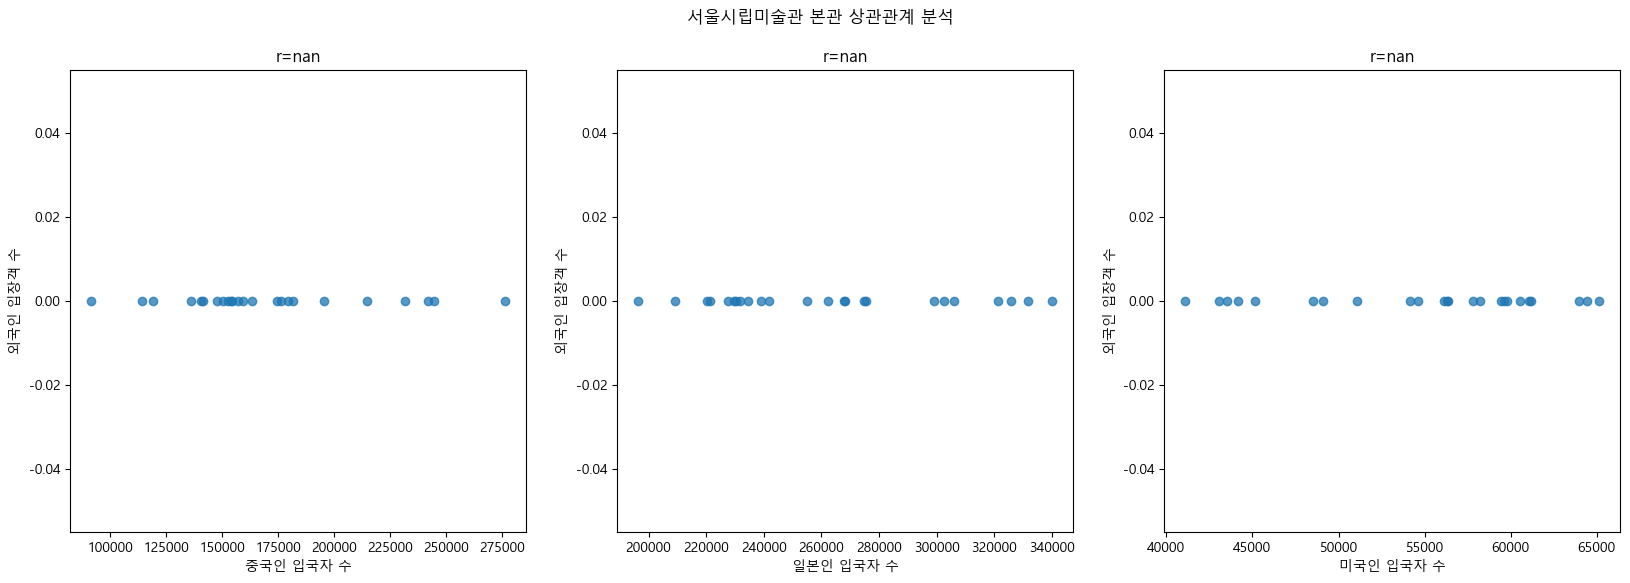

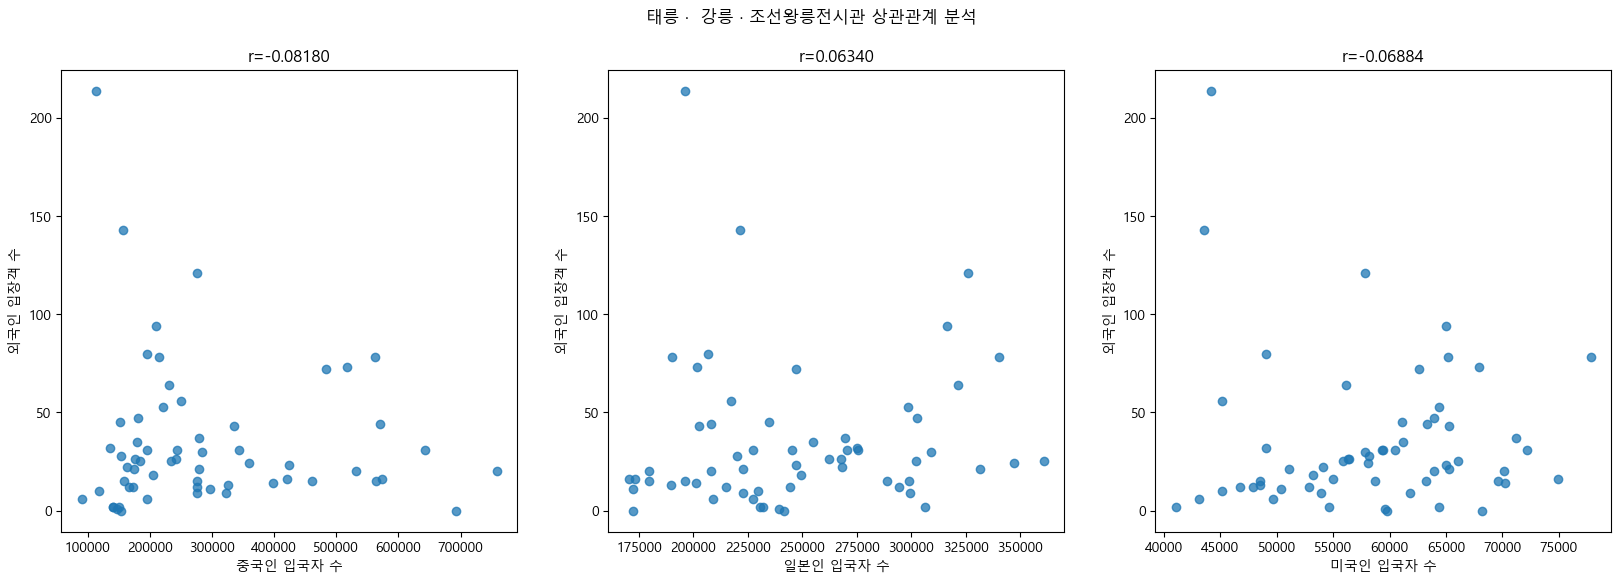

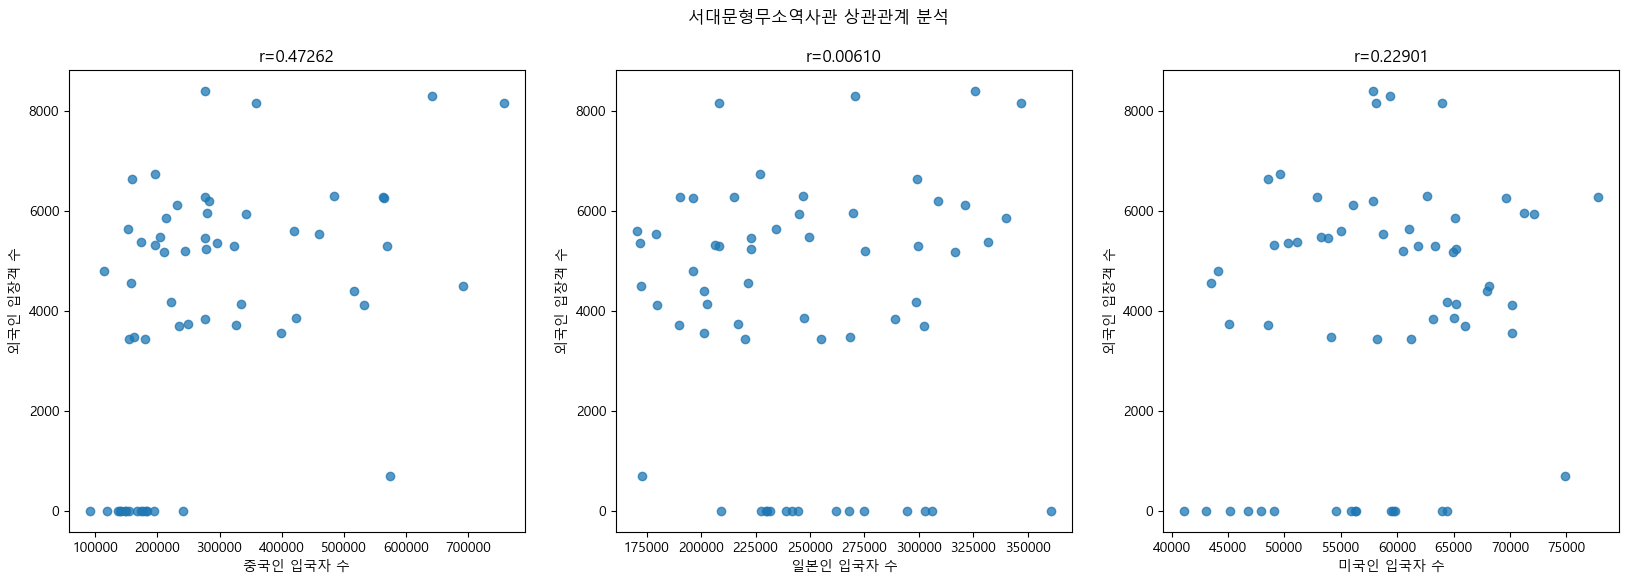

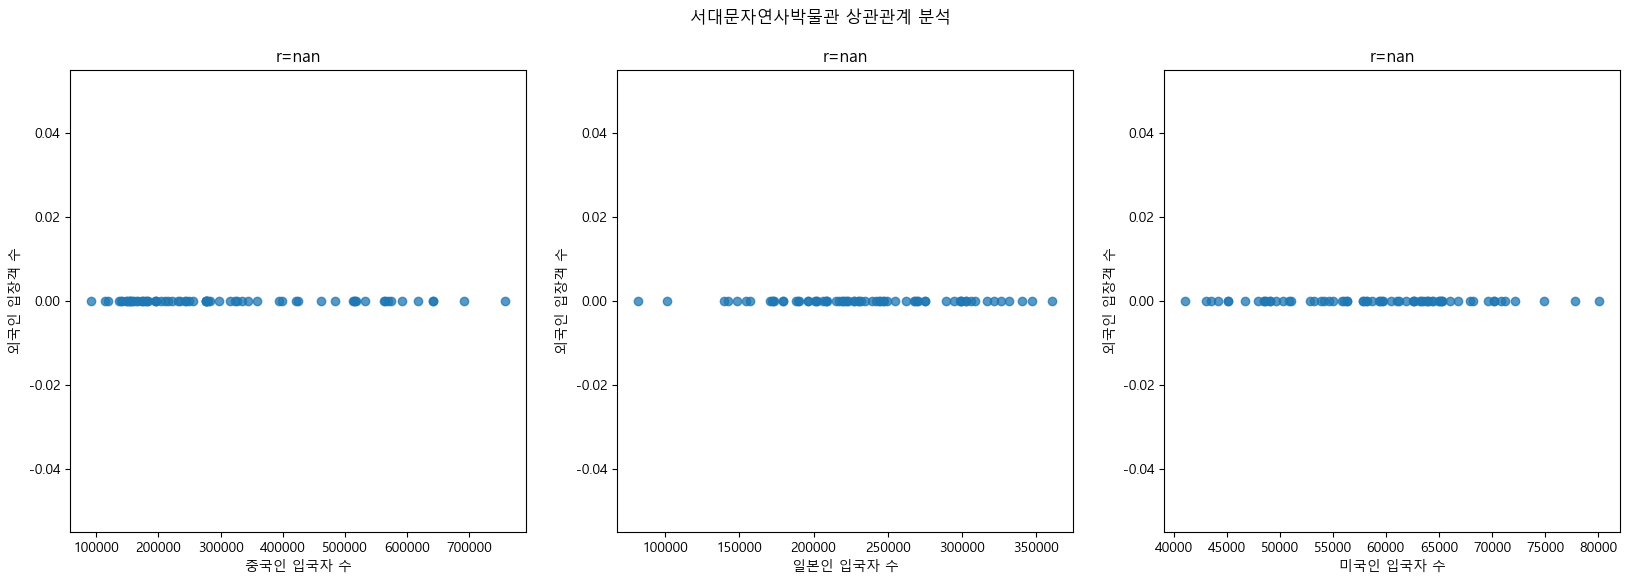

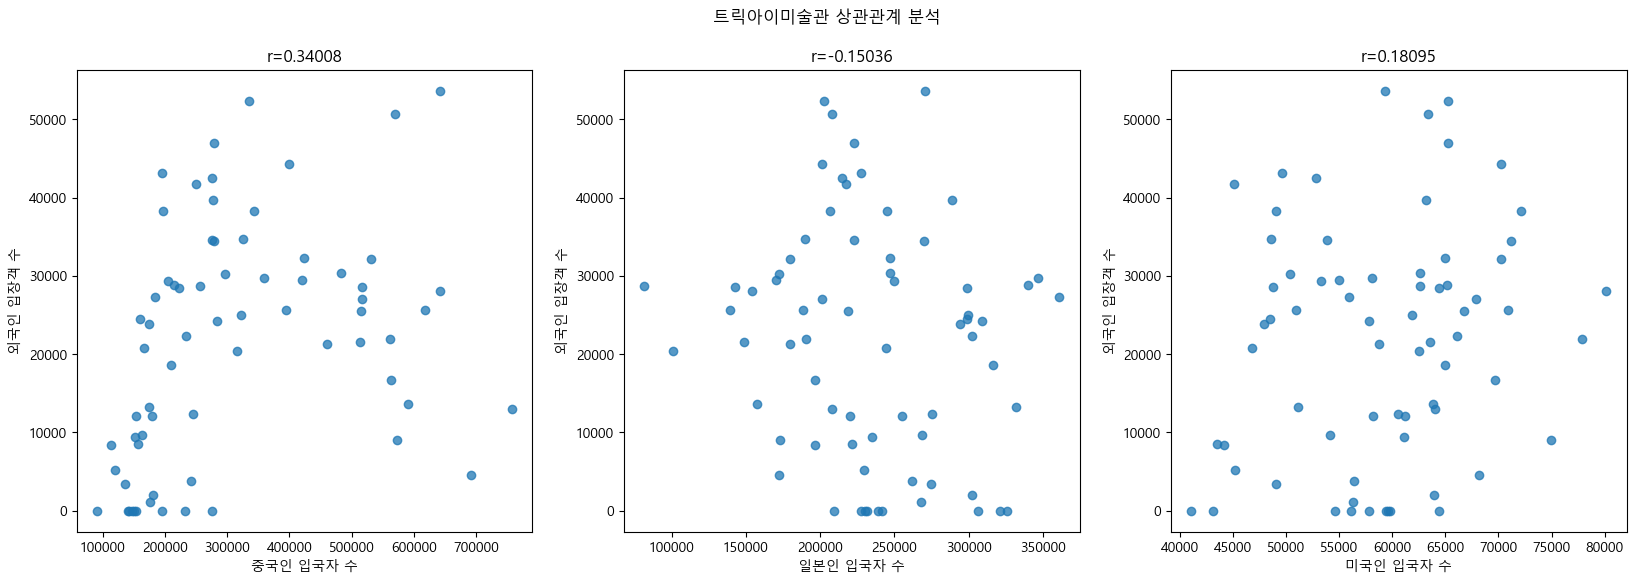

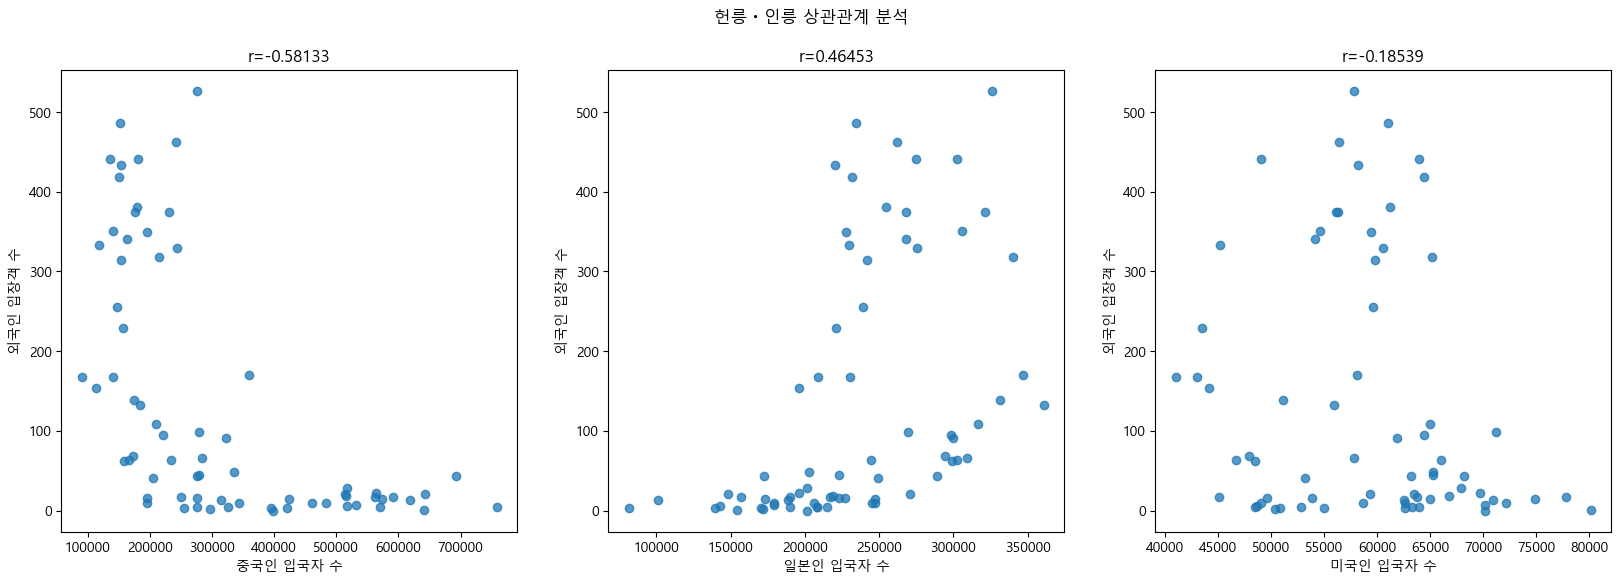

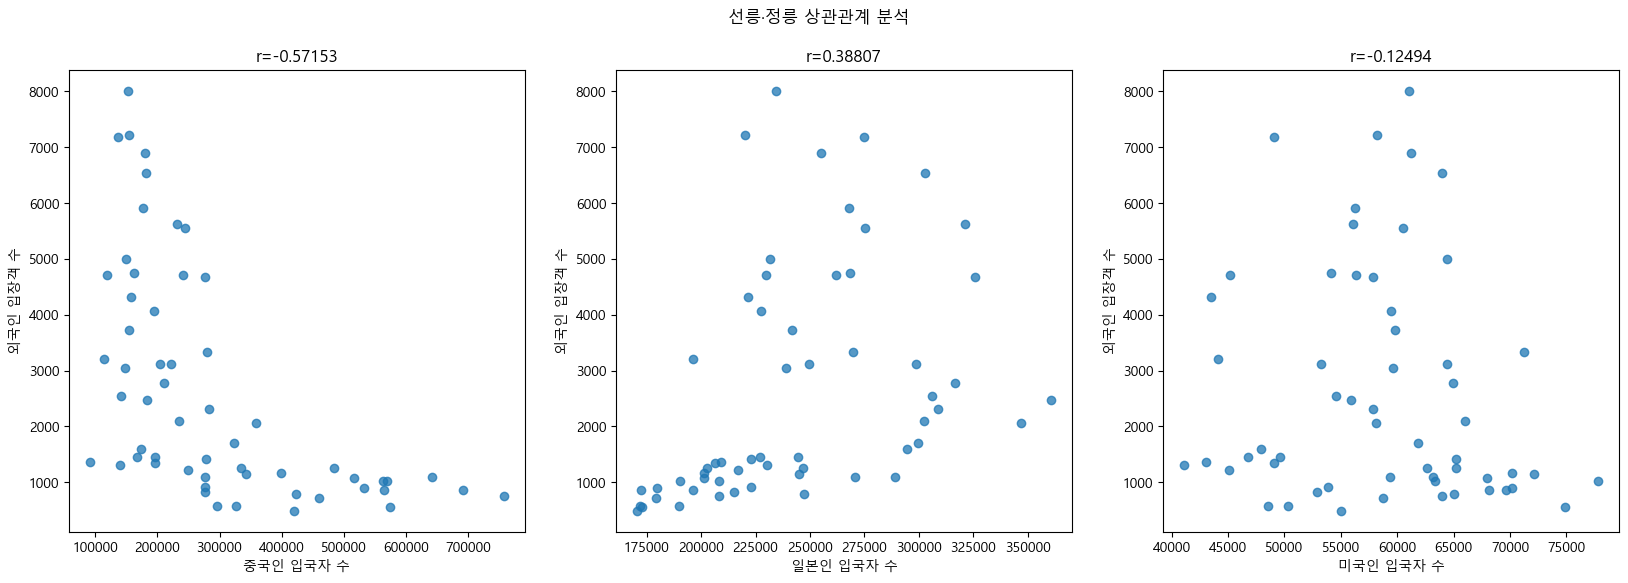

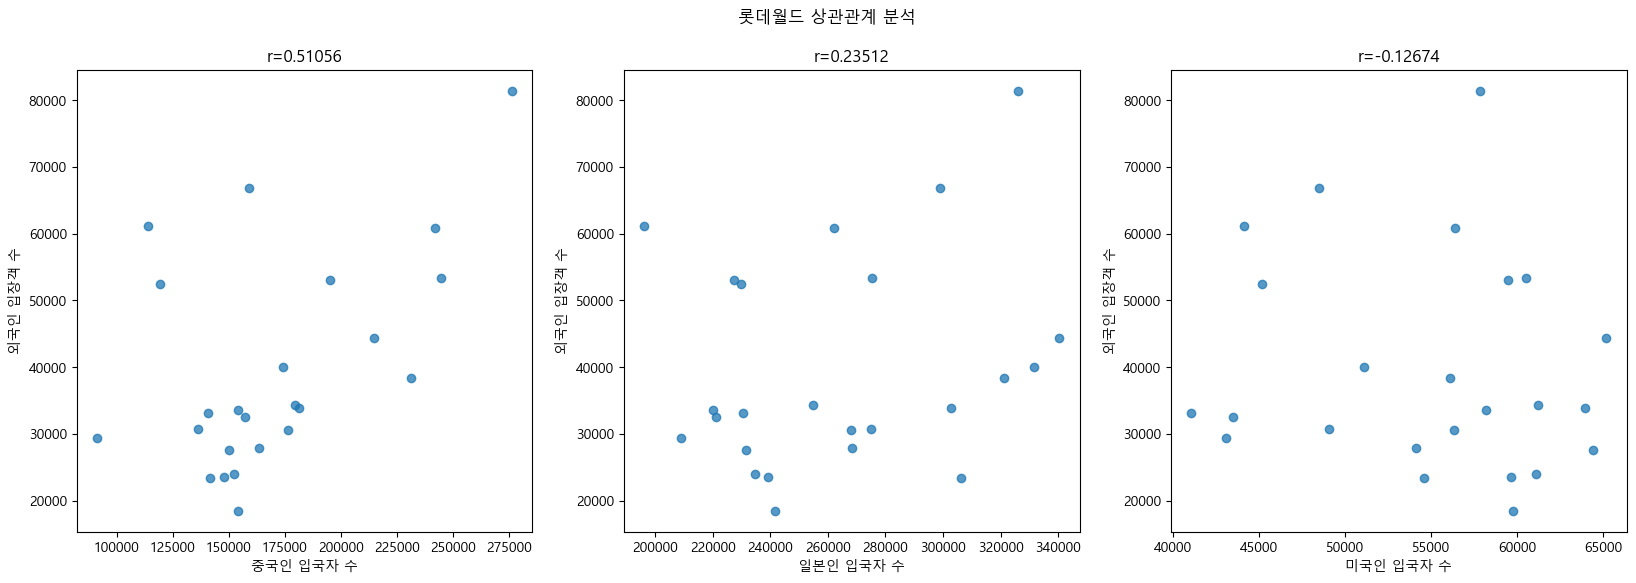

In [90]:
r_list=[]
for tourpoint in resNm:
    r_list.append(setScatterGraph(tour_table, fv_table, tourpoint))

<Axes: ylabel='tourpoint'>

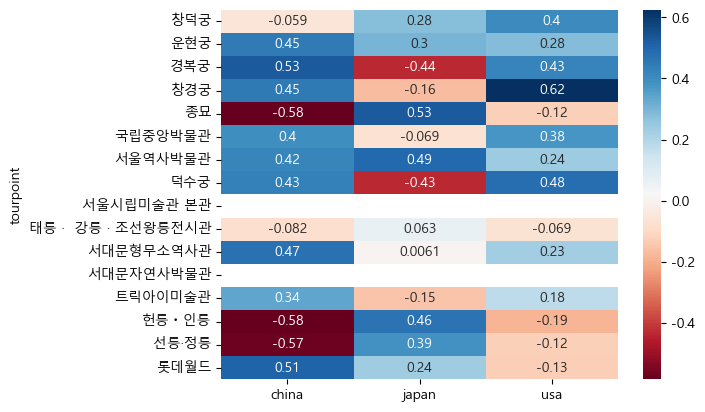

In [95]:
r_list
r_df = pd.DataFrame(r_list, columns=['tourpoint', 'china', 'japan', 'usa'])
r_df = r_df.set_index('tourpoint')
r_df
sns. heatmap(r_df, annot=True, cmap='RdBu')